# Shockley Ramo Analysis of CZT Detector 2

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

# general package imports
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.signal import find_peaks, peak_prominences
from scipy.optimize import curve_fit
from scipy.stats import linregress
# from spectrum import gaussian
import pandas as pd

# import tool repo
import sys

# UPDATE PATH TO PATH WHERE YOU HAVE REPO SAVED
sys.path.append('/Users/kalie/courses/ne204/lab/kalie-trevor-ian-lab3')
from shockley_ramo import charge_transport_model

# Cathode analysis

In [2]:
# initialize charge transport model
ctm_cathode = charge_transport_model()

In [3]:
# loop at map of anode face
ctm_cathode.geom_map[0]

array([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 6, 6, 6, 6, 6, 6, 6, 3, 5, 5, 5, 5, 5, 5, 5,
       3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3])

<IPython.core.display.Javascript object>


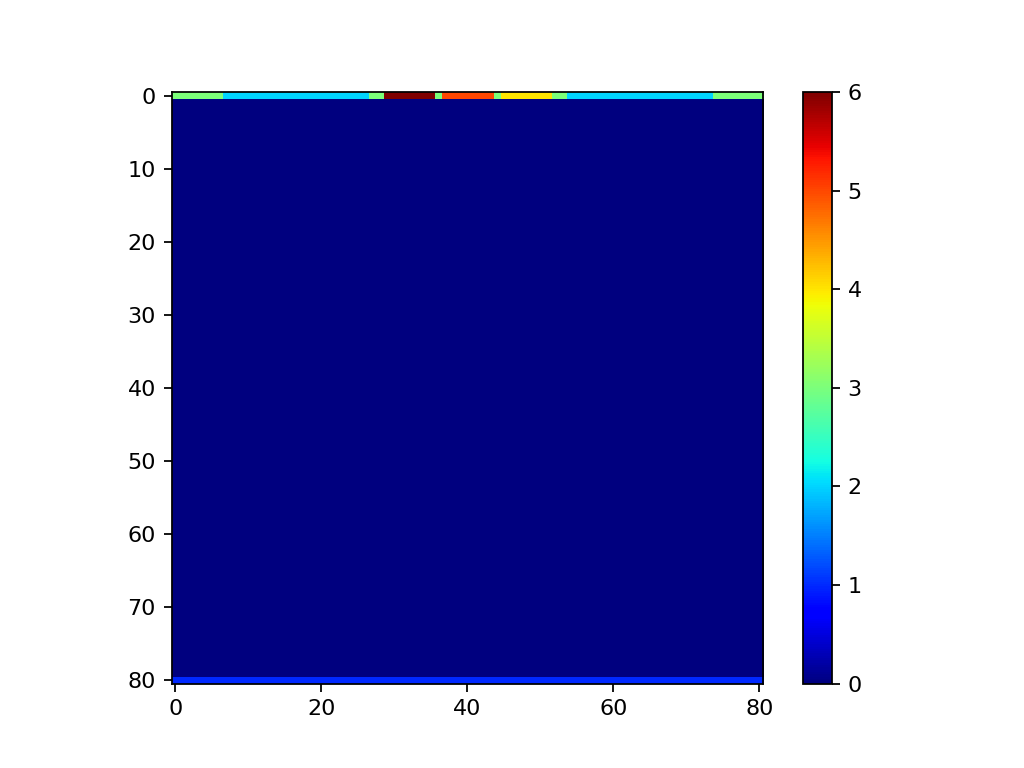

In [4]:
# view geometry map
plt.figure()
plt.imshow(ctm_cathode.geom_map,cmap='jet')
plt.colorbar()
plt.savefig('figs/geom_map.png')
plt.show()

In [5]:
# find WP of cathode
ctm_cathode.find_WP(1) # contact 1 = cathode

<IPython.core.display.Javascript object>


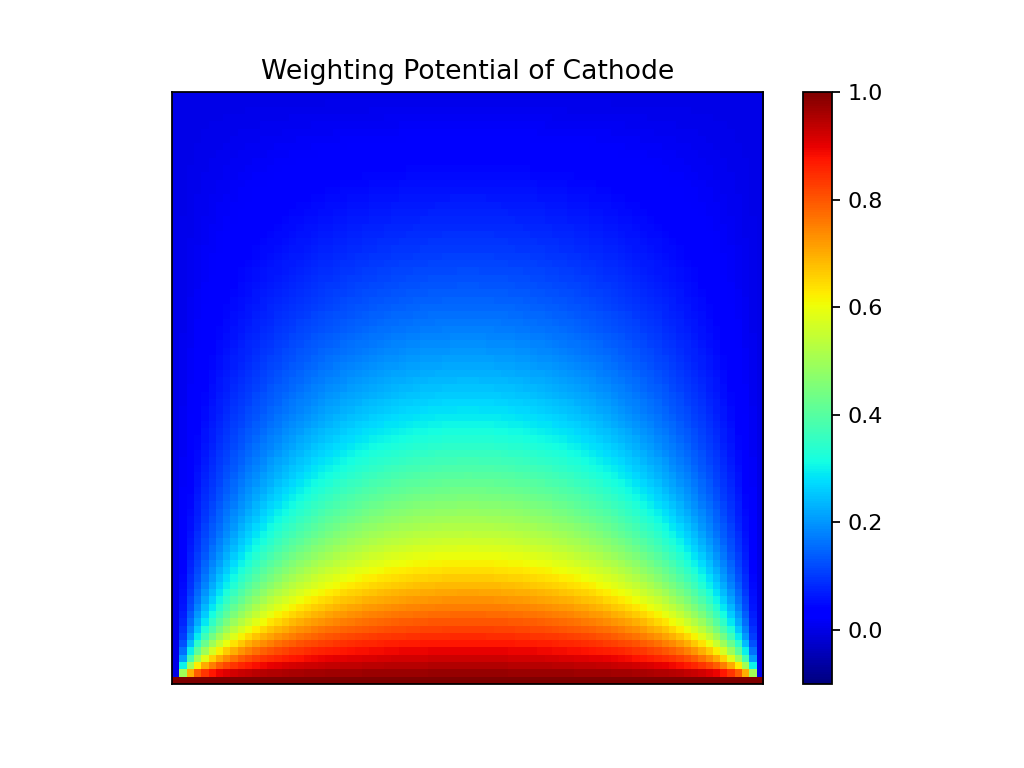

In [6]:
ctm_cathode.plot_WP()
plt.title('Weighting Potential of Cathode')
plt.savefig('figs/WP_Cathode.png')

<IPython.core.display.Javascript object>


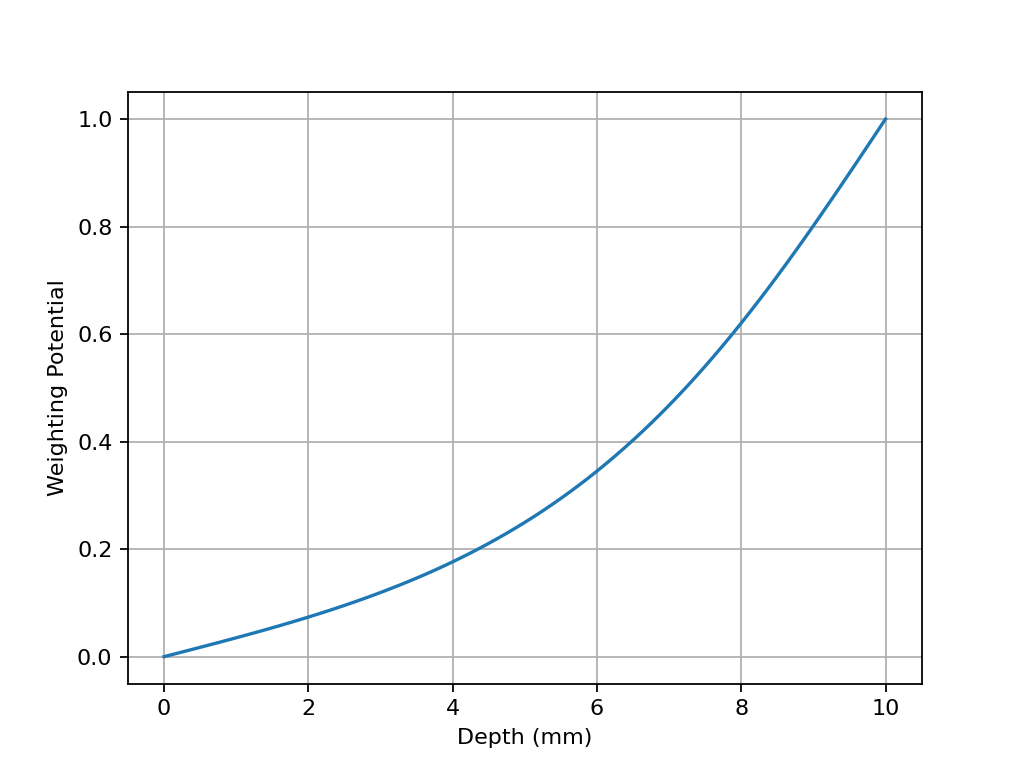

In [7]:
ctm_cathode.plot_WP_slice(41) # grab slice in middle of detector (index 41)
plt.savefig('cathode_WP_slice.png')

In [24]:
# find rise times for various depths
depths = np.linspace(0.5,9.5)
rise_times = np.zeros(len(depths))
for i in range(len(depths)):
    rise_times[i] = ctm_cathode.drift_particles_cathode(41,depths[i])

In [25]:
rise_times

array([4512., 4496., 4483., 4471., 4463., 4456., 4451., 4447., 4446.,
       4446., 4449., 4451., 4456., 4463., 4396., 4308., 4219., 4130.,
       4039., 3947., 3854., 3758., 3662., 3564., 3466., 3366., 3264.,
       3161., 3047., 2928., 2810., 2689., 2569., 2447., 2324., 2200.,
       2076., 1949., 1823., 1696., 1568., 1439., 1310., 1180., 1050.,
        918.,  787.,  656.,  541.,  437.])

<IPython.core.display.Javascript object>


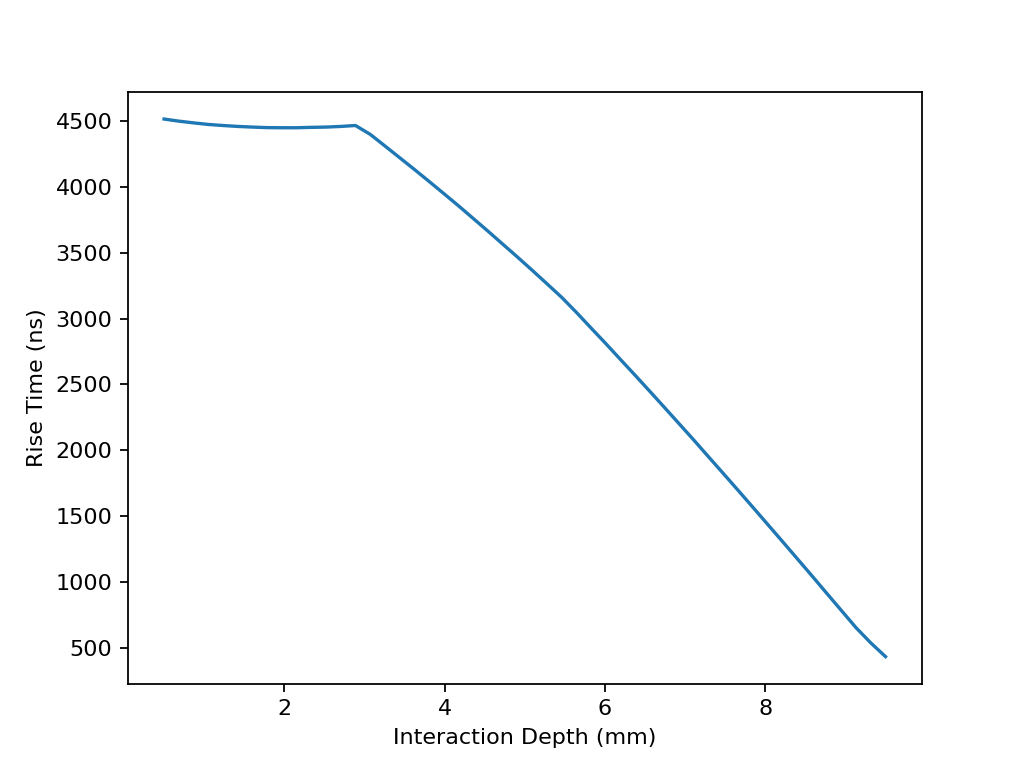

Text(0, 0.5, 'Rise Time (ns)')

In [26]:
plt.figure()
plt.plot(depths,rise_times)
plt.xlabel('Interaction Depth (mm)')
plt.ylabel('Rise Time (ns)')

<IPython.core.display.Javascript object>


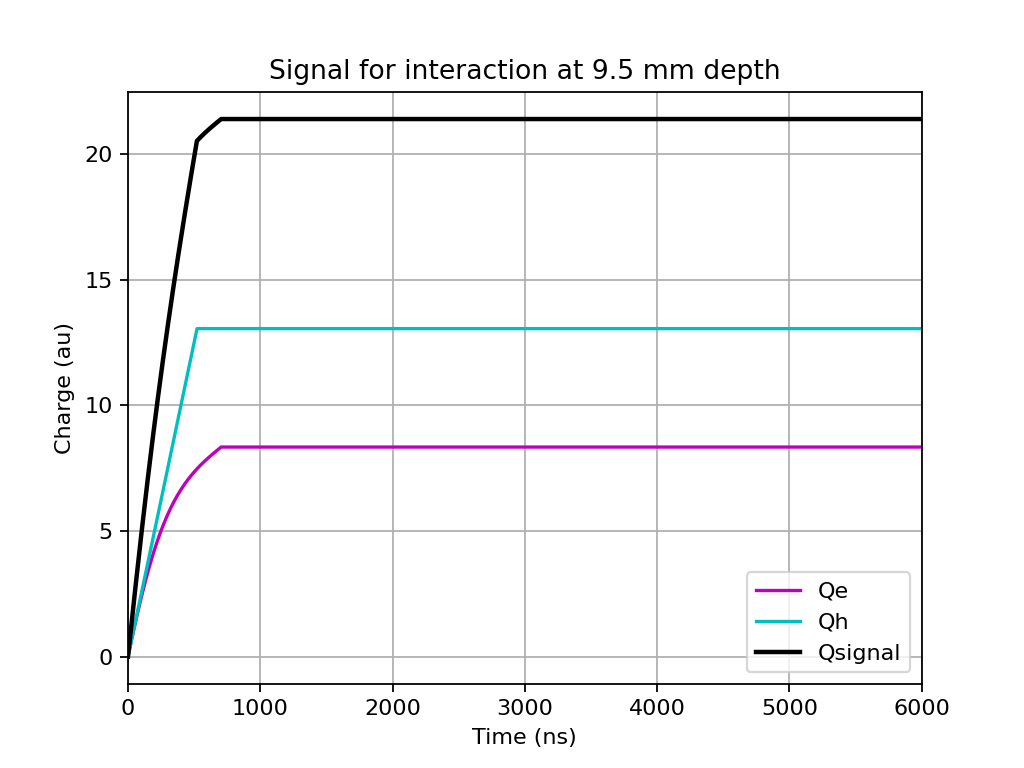

rise time =  437 ns


In [27]:
# plot rise times
depth = 9.5
rise_time = ctm_cathode.drift_particles_cathode(41,depth,show_plot=True)
# plt.xlim(0,1000)
print('rise time = ',rise_time,'ns')

# Anode 5 analysis

In [28]:
ctm_anode = charge_transport_model()

In [29]:
# find WP of cathode
ctm_anode.find_WP(5) # contact 5 = anode 5

<IPython.core.display.Javascript object>


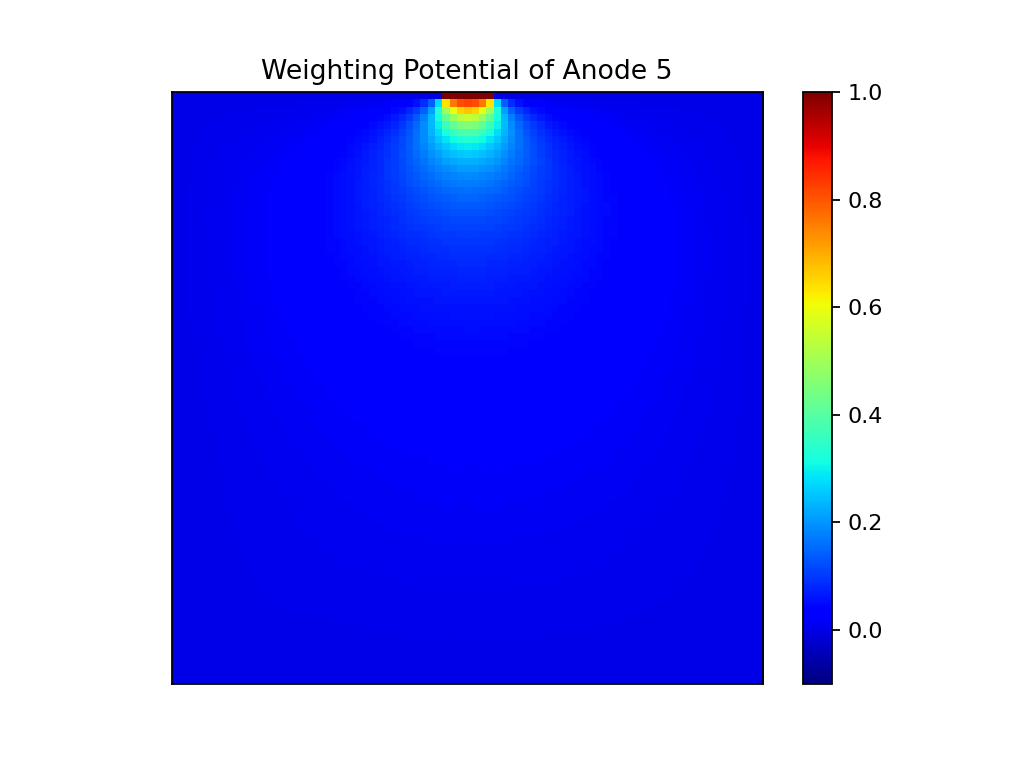

Text(0.5, 1.0, 'Weighting Potential of Anode 5')

In [30]:
ctm_anode.plot_WP()
plt.title('Weighting Potential of Anode 5')

<IPython.core.display.Javascript object>


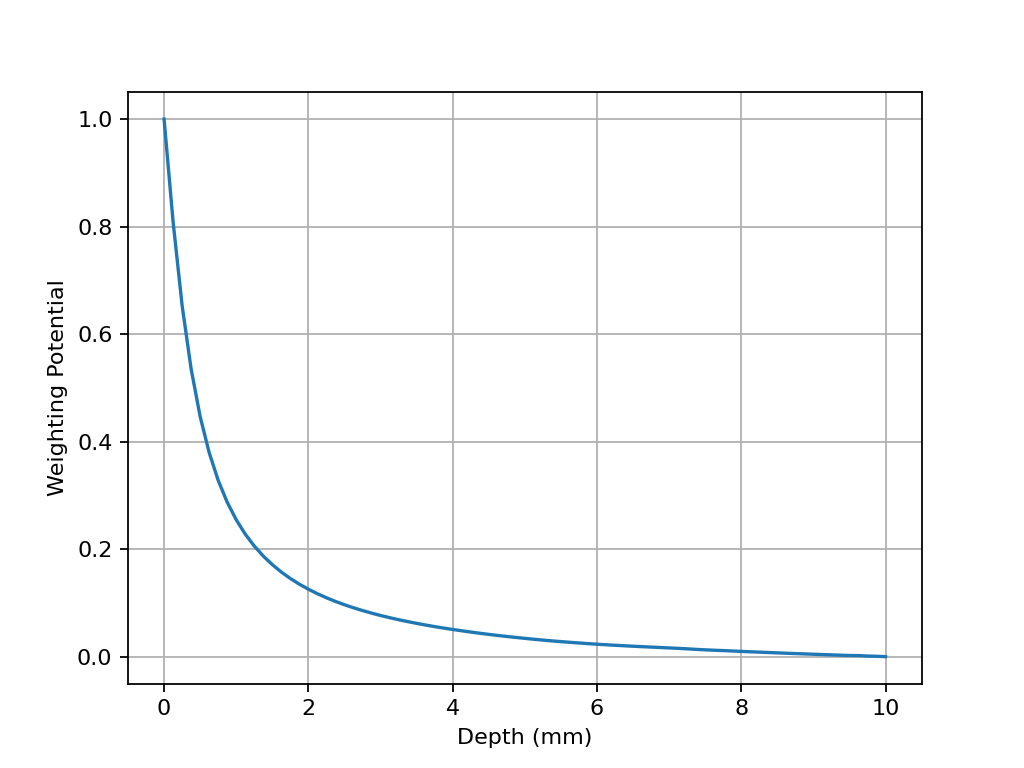

In [31]:
ctm_anode.plot_WP_slice(41)

<IPython.core.display.Javascript object>


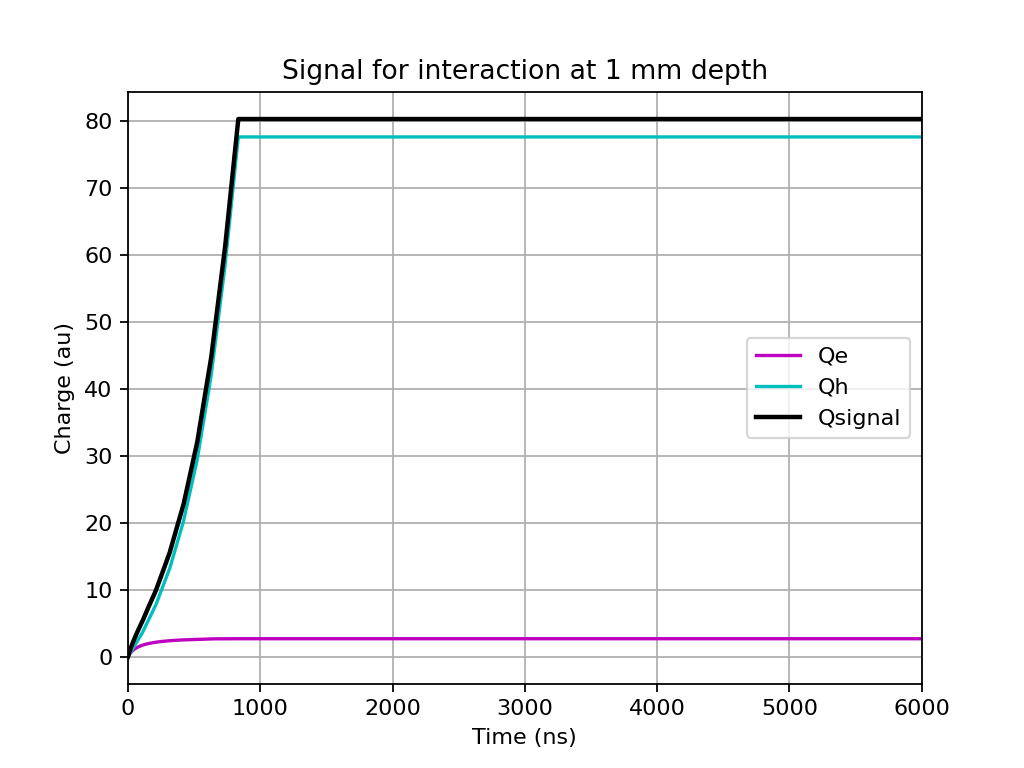

623

In [32]:
# plot anode drift times
depth = 1
ctm_anode.drift_particles_anode(41,depth,show_plot=True)

In [33]:
depths = np.linspace(0.1,9.9)
rise_times = np.zeros(len(depths))
for i in range(len(depths)):
    rise_times[i] = ctm_anode.drift_particles_anode(41,depths[i])

<IPython.core.display.Javascript object>


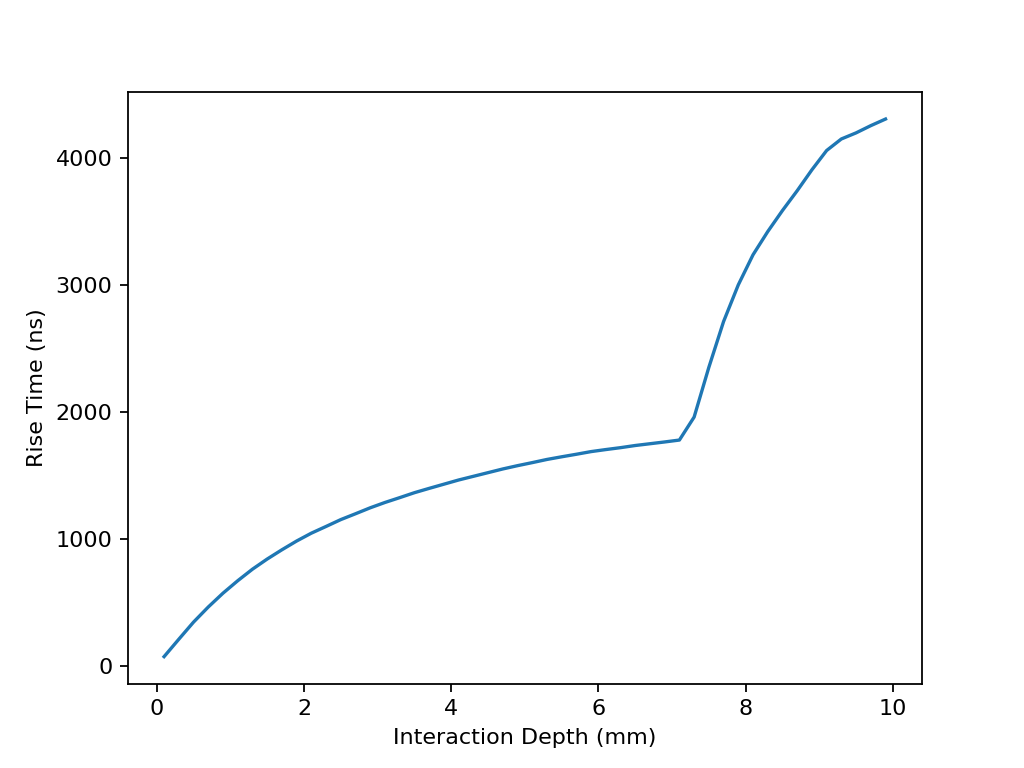

In [35]:
plt.figure()
plt.plot(depths,rise_times)
plt.xlabel('Interaction Depth (mm)')
plt.ylabel('Rise Time (ns)')
plt.show()